# Random Forest Demonstration
## Overview
We are using a Random Forest Classifier to predict the volatility regimes in the markets. In short, the random forest is known as the "black box" algorithm. It constructs multiple decision trees that output a classiefier prediction and randomizes each tree to protect against overfitting of the data. The result of all the individual trees becomes our random forest prediction. 


## Vol_Data class example

### FRED IDs with labels:

DCOILBRENTEU: European Brent Oil Prices

BAMLH0A0HYM2: US high yield index option-adjusted spread

GOLDAMGBD228NLBM: Gold fixing price in London Bullion

DAAA: Moody's corporate bond yield

RIFSPPFAAD01NB: Overnight commercial paper interest rate

BAMLHE00EHYIOAS: Euro high yield index option-adjusted spread

### Other data 
GDX_Volume: Weekly Volume of the GDX etf, which tracks gold miners

SHY_Volume: Weekly Volume of the SHY etf, which is a 1-3 yr treasury bond fund

SPY_Volume: Weekly Volume of the SPY etf, representing the S&P500

In [32]:
from Code.Data.Inputs import volClass #imports volClass file which contains Vol_Data
#fred IDs to access Fred data
fred_s = ["DCOILBRENTEU","BAMLH0A0HYM2", "GOLDAMGBD228NLBM","DAAA","RIFSPPFAAD01NB","BAMLHE00EHYIOAS"]

#create vol_data object
# Vol_Data(start_date, end_date = None, fred_strings = None) Notice default for end_date and fred_strings is None
trial_vol = volClass.Vol_Data("2007-01-01", fred_strings = fred_s)

In [33]:
from Code.Data import rfClass

# Regime_Predict(Vol_Data object, test_size = .3, n_estimators= 10) we chose default test data size as .3 and n_estimators for random forest as 10
trial_regime_predict = rfClass.Regime_Predict(trial_vol)

In [34]:
trial_regime_predict.all_prob

,Low_Vol,Med_Vol,High_Vol
Week,,,
2007-01-08,1.0,0.0,0.0
2007-01-16,1.0,0.0,0.0
2007-01-22,1.0,0.0,0.0
2007-01-29,1.0,0.0,0.0
2007-02-05,1.0,0.0,0.0
...,...,...,...
2020-06-01,0.1,0.4,0.5
2020-06-08,0.0,0.0,1.0
2020-06-15,0.0,0.0,1.0


In [35]:
trial_regime_predict.all_predictions_df

,Vol_Regime
Week,
2007-01-08,-1
2007-01-16,-1
2007-01-22,-1
2007-01-29,-1
2007-02-05,-1
...,...
2020-06-01,1
2020-06-08,1
2020-06-15,1


In [20]:
a = trial_regime_predict.Regime_Accuracy()
print("The accuracy of our model to predict the right category is: ")
print("%.3f" % a + "%")

The accuracy of our model to predict the right category is: 
0.854%


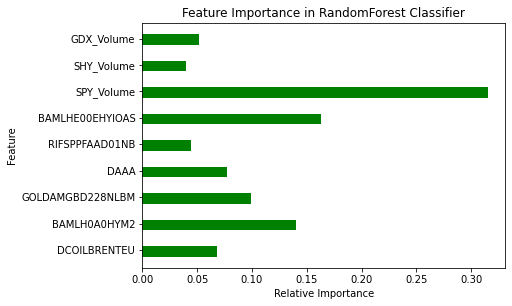

<Figure size 360x360 with 0 Axes>

In [12]:
trial_regime_predict.plot_feature_importances()


This graph illustrates which of the factors we used, and the relative significance of them in our actual predictions.